# Demonstração do Método de K-medoids

O k-medoids diz respeito a um **método genérico** de solução proposta ao **problema de particionamento**, problema este o cerne dos Algoritmos  **Clusterização Não Hierárquicos**, que têm por objetivo fragmentar as entradas de dados em grupos de 1 até k, de maneira a minimizar o somotário da **medida de dissimilaridade** usada (que costuma ser a distância euclidiana) entre cada ponto até o **objeto conceitual** definido como centro. Para o método k-means o centro é definido pela Média dos valores do cluster, para o k-medoids o **centro é convencionado** como sendo a própria medida conhecida como **Medóide**, que nada mais é que o evento real localizado mais ao centro de um aglomerado (DONI, 2004).


O cálculo da média na maioria das vezes retorna um valor que não existe de fato entre os eventos, então o Medoide é como se fosse o ponto real mais próximo desse ponto virtual que, caso existisse, estaria localizado no espaço observado que contivesse **o menor somatório das distâncias** entre todos os dados reais deste espaço.
Pode ser **interpretado como** o ponto real mais próximo do que seria a **mediana**, caso esta estivesse definida para **espaços multidimensionais**. 

   Pode-se deduzir que o k-medoids, por escolher pontos de dados reais como centro, possui **maior interpretabilidade** destes centros de cluster do que seria com o uso do **k-means** que utiliza a **Média**. Penso que, para **variáveis quantitativas**, ao menos as de **Escala Racional**, a média por si costuma ser representativa (com exceção de dados não distribuídos normalmente), o que torna indiferente usar um ou outro. Em contrapartida, como o cálculo da Média torna-se explicitamente inadequado para **variáveis de Escala Nominal**, o uso do **K-Medoids** para estes casos pode ser o mais recomendado. 
   
   Outro fator que pode tornar o k-medoids mais apropriado que o k-means é que, por ele minimizar o somatório das diferenças par a par **(distância absoluta)**, ao invés da soma das **distâncias internas ao quadrado**, ele acaba sendo **menos sensível à outliers** que o k-means, podendo ser mais adequado para análises que visam contemplar possíveis outliers. O uso dos Medóides no lugar do k-means também é aconcelhável quando o sistema analisado requer uma **medida de dissimilaridade** diferente da **Distância Euclidiana**. O  K-means tende a gerar grupos mais “redondos”, de tamanhos similares, pois seu objetivo é **minimizar a variação interna**, e portanto ele tende a não se adequar tão bem à dados com formatos irregulares. Por consequência esse método geralmente requer a distância euclidiana para soluções eficientes, e por isso o uso dos **Medóides** acaba sendo uma alternativa para a análise de sistemas que precisem usar outras medidas de dissimilaridade, o que acaba sendo **estritamente necessário** para sistemas de **alta dimensionalidade** (SKIKIT-LEARN).
   
   O **problema do particionamento** é classificado pela Teoria da Computação como NP-difícil, existindo assim muitas soluções heurísticas disponíveis.

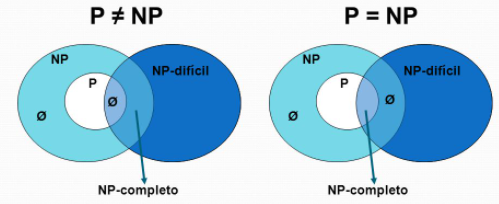
   
   Os **algoritmos iterativos** que se propõe a **computar a resolução** de K-medoids são: PAM- Partitioning Around Medoids, baseado em no algoritmo Greedy Search, Algoritmo de Iteração de Voronoi, CLARA e CLARANS.
   
**Partitioning Around Medoids (PAM):**
O algoritmo PAM pode ter seus processos interpretados pela analogia de um pseudocódigo descrito abaixo:

1- BUILD: Utiliza um algoritmo de Busca Gulosa para definir as coordenadas dos pontos para cada K afim de minimizar o custo;

2- BUILD:  Associa cada ponto ao Medoid mais próximo;

3- SWAP: Durante a otimização do custo da configuração dos pontos:
```
   for n_med in list(não_medoids):
       medoid_atual = n_med 
       delta_custo_atual = self.calcula_delta_custo(medoid_atual)

       If delta_custo_atual <  delta_custo_anterior:
          pares_medoid_naomedoid.append(medoid_anterior, medoid_atual)
                                 
   cluster_centers_, labels_ = self.determina_melhores_medoids( pares_medoid_naomedoid )
                  
#Onde o atributo cluster_centers_ retorna os melhores medoids encontrados, e o atributo labels_ retorna a lista ordenada do rótulo do cluster atribuído, linha a linha, pelo modelo treinado.                         
```                
   
Nesta demonstração **usaremos o algoritmo PAM** da biblioteca **sklearn_extra**.cluster.kmedoids implementada em Python, juntamente com o Dataset de reclamações no site Consumidor.gov do 2º Semestre de 2021 finalizadas até o mês de dezembro, que pode ser obtida através da guia de Dados Abertos no endereço: https://www.consumidor.gov.br/pages/dadosabertos/externo/

**REFERÊNCIAS:** 

DONI, M. V. **Análise de Cluster: Métodos Hierárquicos e de Particionamento**. 2004. Trabalho de Graduação Interdisciplinar (Bacharel em Sistemas de Informação pela Faculdade de Computação e Informática). Universidade Presbiteriana Mackenzie. São Paulo

**CLUSTERING**: 2.3.2. K-means, 2007-2021. Scikit-learn. Disponível em: < https://scikit-learn.org/stable/modules/clustering.html >Acesso em: 21/01/2022.

## Importação e Carregamento dos Dados

In [1]:
!pip install scikit-learn-extra

In [2]:
!pip install category-encoders

In [3]:
!pip install seaborn

In [31]:
import pandas as pd 
import numpy as np
import re
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE 
from sklearn import metrics as me
from matplotlib import pyplot as plt
from textwrap import wrap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb

In [32]:
df_bruto = pd.read_csv(r"DadosAbertos_ConsumidorGov_finalizadas_2021sem2.csv", sep=';', dtype="category")

In [33]:
#df_bruto["index"] = df_bruto.index
df_bruto.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,SE,SP,Fartura,M,entre 31 a 40 anos,01/12/2021,10,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Atendimento / SAC,Dificuldade de contato / demora no atendimento,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN
1,NE,MA,Codó,F,mais de 70 anos,01/12/2021,10,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN
2,NE,PE,Recife,F,entre 31 a 40 anos,01/12/2021,10,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Contrato / Oferta,Venda casada,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
3,N,PA,Ananindeua,M,entre 31 a 40 anos,02/12/2021,10,Facebook / Instagram,Provedores de Conteúdo e Outros Serviços na In...,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Atendimento / SAC,Má qualidade no atendimento (descortesia / des...,Não comprei / contratei,N,S,Finalizada não avaliada,Não Avaliada,NaN
4,SE,SP,São Paulo,F,entre 31 a 40 anos,02/12/2021,10,Oi Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN


## Pré-processamento

In [34]:
df_bruto.rename(columns={
    "Faixa Etária":"FaixaEtaria",
    "Data Finalização":"DataFinal",
    "Tempo Resposta":"TempoResposta",
    "Nome Fantasia":"NomeFantasia",
    "Segmento de Mercado":"SegmentoMercado",
    "Grupo Problema": "GrupoProblema",
    "Como Comprou Contratou":"ComoComprouContratou",
    "Procurou Empresa":"ProcurouEmpresa",
    "Avaliação Reclamação": "AvaliaçãoReclamação",
    "Nota do Consumidor": "NotaConsumidor"},
    inplace=True
)

In [35]:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739791 entries, 0 to 739790
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Região                739791 non-null  category
 1   UF                    739791 non-null  category
 2   Cidade                739791 non-null  category
 3   Sexo                  739732 non-null  category
 4   FaixaEtaria           739791 non-null  category
 5   DataFinal             739791 non-null  category
 6   TempoResposta         730164 non-null  category
 7   NomeFantasia          739791 non-null  category
 8   SegmentoMercado       739791 non-null  category
 9   Área                  739791 non-null  category
 10  Assunto               739791 non-null  category
 11  GrupoProblema         739791 non-null  category
 12  Problema              739791 non-null  category
 13  ComoComprouContratou  739791 non-null  category
 14  ProcurouEmpresa       739791 non-nul

In [36]:
#df = df_bruto.dropna()
#df["TempoResposta"]= df.loc[:,"TempoResposta"].astype("float64")
#df["NotaConsumidor"]= df.loc[:,"NotaConsumidor"].astype("float64")
#df.info()

df = df_bruto.copy()

In [37]:
pd.DataFrame(df.nunique()).head(None)

,0
Região,5
UF,27
Cidade,5690
Sexo,3
FaixaEtaria,7
DataFinal,184
TempoResposta,16
NomeFantasia,1002
SegmentoMercado,44
Área,13


In [38]:
list(df.Sexo.unique())

['M', 'F', 'O', nan]

In [39]:
list(df.FaixaEtaria.unique())

['entre 31 a 40 anos',
 'mais de 70 anos',
 'entre 41 a 50 anos',
 'entre 61 a 70 anos',
 'entre 51 a 60 anos',
 'entre 21 a 30 anos',
 'até 20 anos']

Tratando o nome das colunas do tipo ordinal, para posteriormente ordená-las

In [40]:
df["FaixaEtaria"] = df.FaixaEtaria.apply(lambda x: x.replace("até 20 anos", "entre 0 a 20 anos").replace("mais de 70 anos", "entre 70 a 120 anos"))
list(df.FaixaEtaria.unique())

['entre 31 a 40 anos',
 'entre 70 a 120 anos',
 'entre 41 a 50 anos',
 'entre 61 a 70 anos',
 'entre 51 a 60 anos',
 'entre 21 a 30 anos',
 'entre 0 a 20 anos']

In [41]:
pd.DataFrame(df.GrupoProblema.value_counts()/df.shape[0]*100).head()

,GrupoProblema
Cobrança / Contestação,42.972813
Contrato / Oferta,19.520513
Atendimento / SAC,15.530873
Vício de Qualidade,12.970555
Entrega do Produto,3.821620


In [42]:
pd.DataFrame(df.SegmentoMercado.value_counts()).head(None).T

,"Bancos, Financeiras e Administradoras de Cartão","Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)",Transporte Aéreo,Comércio Eletrônico,Empresas de Pagamento Eletrônico,"Seguros, Capitalização e Previdência",Energia Elétrica,Empresas de Intermediação de Serviços / Negócios,"Viagens, Turismo e Hospedagem","Fabricantes - Eletroeletrônicos, Produtos de Telefonia e Informática",...,Serviços Esportivos,Fabricantes - Produtos Alimentícios,Entretenimento,Transporte Terrestre,"Fabricantes - Móveis, Colchões e Acessórios",Entidades Sem Fins Lucrativos,Fabricantes - Produtos Químicos e Farmacêuticos,"Bares, Restaurantes, Casas Noturnas e Similares",Shopping Centers,"Hospitais, Clínicas, Laboratórios e Outros Serviços de Saúde"
SegmentoMercado,232590,147709,58969,52044,31015,29177,24252,23652,23198,16773,...,707,684,654,360,80,61,31,3,2,2


Estratificando o Dataset a ser usado no modelo, eliminando as colunas redundantes de região e mantendo apenas
as features que qualificam um cliente (e sua motivação para a reclamação)

In [43]:
df_varejo = df.loc[(df.NomeFantasia.str.contains("Leroy")) | (df.SegmentoMercado=="Varejo")]
df_varejo.shape

(7394, 19)

In [44]:
df_personas = df_varejo.iloc[:, [1, 3, 4, 11]].sort_values(by="FaixaEtaria", axis=0, ascending=True).dropna()
df_personas.head()

,UF,Sexo,FaixaEtaria,GrupoProblema
638525,GO,F,entre 0 a 20 anos,Vício de Qualidade
276706,SP,F,entre 0 a 20 anos,Cobrança / Contestação
88437,SC,M,entre 0 a 20 anos,Entrega do Produto
27359,PR,M,entre 0 a 20 anos,Cobrança / Contestação
726572,MT,F,entre 0 a 20 anos,Contrato / Oferta


## Análise Exploratória

In [45]:
df_personas.describe()

,UF,Sexo,FaixaEtaria,GrupoProblema
count,7394,7394,7394,7394
unique,26,3,7,8
top,SP,F,entre 31 a 40 anos,Cobrança / Contestação
freq,1957,3780,2526,2087


In [46]:
pd.crosstab(df_personas.Sexo, df_personas.UF)

UF,AC,AL,AM,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
Sexo,,,,,,,,,,,,,,,,,,,,,
F,10,21,72,247,70,169,89,144,40,406,...,388,349,26,11,6,264,198,11,987,10
M,11,20,57,199,84,190,90,126,45,343,...,333,309,34,32,10,271,185,13,969,18
O,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [47]:
pd.crosstab(df_personas.Sexo, df_personas.GrupoProblema)

GrupoProblema,Atendimento / SAC,Cobrança / Contestação,Contrato / Oferta,Dados Pessoais e Privacidade,Entrega do Produto,Informação,Saúde e Segurança,Vício de Qualidade
Sexo,,,,,,,,
F,374,1161,742,47,660,56,59,681
M,397,926,885,63,651,67,30,592
O,2,0,1,0,0,0,0,0


In [48]:
pd.crosstab(df_personas.FaixaEtaria, df_personas.UF)

UF,AC,AL,AM,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
FaixaEtaria,,,,,,,,,,,,,,,,,,,,,
entre 0 a 20 anos,0,0,0,10,2,3,1,3,2,15,...,15,7,0,0,0,5,6,0,31,0
entre 21 a 30 anos,8,21,50,119,48,95,64,89,27,226,...,203,141,23,17,7,124,116,7,502,9
entre 31 a 40 anos,8,7,31,132,68,135,59,108,27,239,...,252,248,15,14,6,131,118,8,724,14
entre 41 a 50 anos,2,5,21,106,17,74,30,35,13,127,...,118,112,7,4,3,114,87,1,380,3
entre 51 a 60 anos,1,4,15,44,12,38,7,21,11,78,...,81,87,6,2,0,81,35,4,190,2
entre 61 a 70 anos,2,3,9,23,5,11,16,10,4,51,...,38,43,8,5,0,56,10,4,98,0
entre 70 a 120 anos,0,1,3,12,2,4,2,4,1,13,...,15,20,1,1,0,24,11,0,32,0


In [49]:
pd.crosstab(df_personas.FaixaEtaria, df_personas.GrupoProblema)

GrupoProblema,Atendimento / SAC,Cobrança / Contestação,Contrato / Oferta,Dados Pessoais e Privacidade,Entrega do Produto,Informação,Saúde e Segurança,Vício de Qualidade
FaixaEtaria,,,,,,,,
entre 0 a 20 anos,5,37,28,0,13,1,2,21
entre 21 a 30 anos,176,539,556,40,387,41,21,291
entre 31 a 40 anos,257,633,580,39,512,43,38,424
entre 41 a 50 anos,155,393,246,17,237,23,15,269
entre 51 a 60 anos,100,253,141,6,102,4,11,159
entre 61 a 70 anos,56,170,59,8,42,8,0,80
entre 70 a 120 anos,24,62,18,0,18,3,2,29


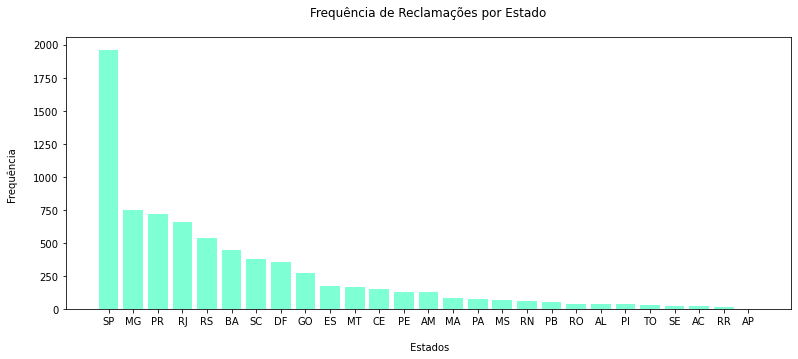

In [50]:
fig = plt.figure(figsize= [13, 5])
plt.bar(df_personas.UF.value_counts().index, list(df_personas.UF.value_counts()), color='aquamarine' )

plt.title("Frequência de Reclamações por Estado\n")
plt.xlabel("\n Estados")
plt.ylabel("Frequência \n")

plt.show()

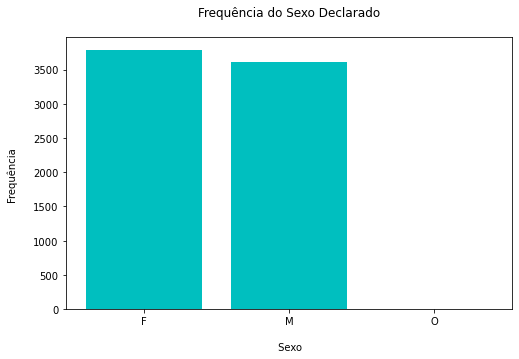

In [51]:
fig = plt.figure(figsize= [8, 5])
plt.bar(df_personas.Sexo.value_counts().index, list(df_personas.Sexo.value_counts()), color='c')

plt.title("Frequência do Sexo Declarado\n")
plt.xlabel("\n Sexo")
plt.ylabel("Frequência \n")
plt.show()

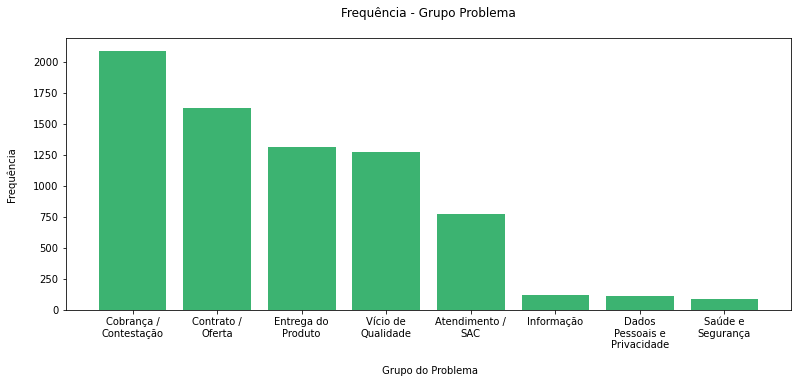

In [52]:
lab = ['\n'.join(wrap(l, 13)) for l in list(df_personas.GrupoProblema.value_counts().index)]

fig = plt.figure(figsize= [13, 5])
plt.bar(lab, list(df_personas.GrupoProblema.value_counts()), color="mediumseagreen")

plt.title("Frequência - Grupo Problema\n")
plt.xlabel("\n Grupo do Problema")
plt.ylabel("Frequência \n")

plt.show()

Transformação de Dados 1 - EXCLUSIVAMENTE para Visualização

OBS: O método de transformação usado aqui é mais adequado para variáveis em escala ordinal, e não nominal como é o caso, por isso está sendo usado exclusivamente para exploração dos dados.

In [53]:

df_view = df_personas.copy()
df_view["index"] = df_personas.index

#Usando tranformação ordinal
enc = OrdinalEncoder(cols= ["UF", "Sexo", "GrupoProblema", "FaixaEtaria"], return_df=True)
#Escolhi estas 3 colunas pois são as três colunas com quantidade similar de valores únicos, 
#o que em tese facilitaria a visualização no gráfico

enc.fit(df_view)
view_person = enc.transform(df_view)

df_cat1 = pd.DataFrame(view_person).add_prefix("cat")
df_cat1 = df_cat1.rename(columns={"catindex":"index"})

df_view1 = pd.merge(df_view, df_cat1, how="outer", on="index")

df_view1.head()

,UF,Sexo,FaixaEtaria,GrupoProblema,index,catUF,catSexo,catFaixaEtaria,catGrupoProblema
0,GO,F,entre 0 a 20 anos,Vício de Qualidade,638525,1,1,1,1
1,SP,F,entre 0 a 20 anos,Cobrança / Contestação,276706,2,1,1,2
2,SC,M,entre 0 a 20 anos,Entrega do Produto,88437,3,2,1,3
3,PR,M,entre 0 a 20 anos,Cobrança / Contestação,27359,4,2,1,2
4,MT,F,entre 0 a 20 anos,Contrato / Oferta,726572,5,1,1,4


In [54]:
#df_sb = df_view1.loc[:,["catUF", "catFaixaEtaria", "catGrupoProblema"]]
#sb.pairplot(df_sb) #,hue="catGrupoProblema")

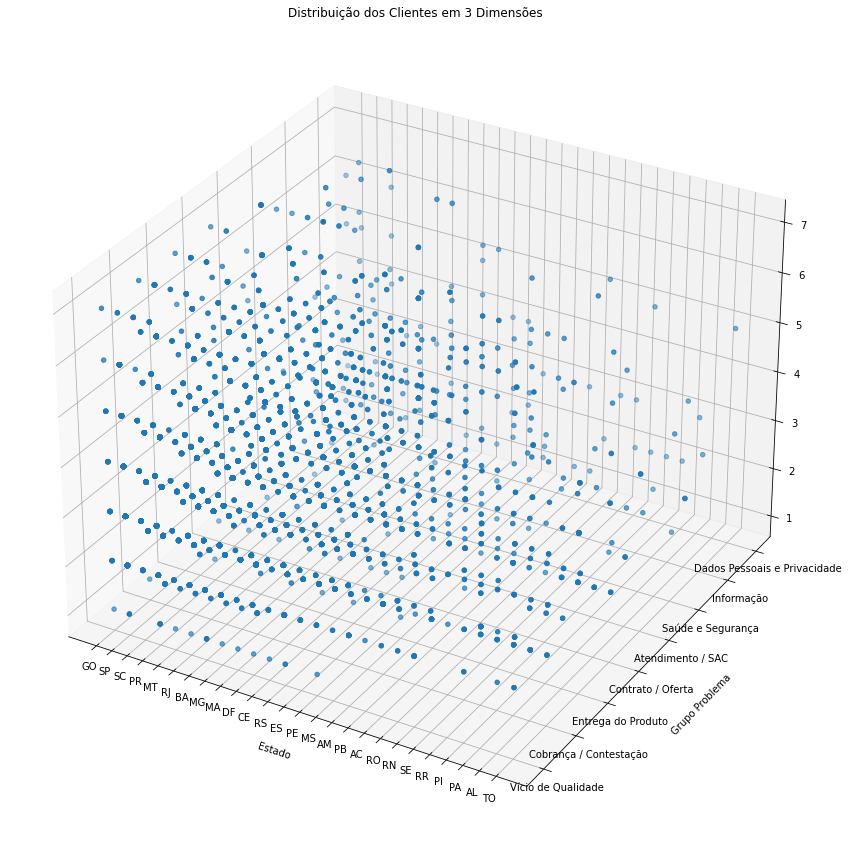

In [55]:
fig = plt.figure(figsize=(20, 15))
#fig.grid(color='0.7', linestyle=':', linewidth=0.5)
graf = fig.gca(projection="3d")


eixox = df_view1.catUF
eixoy = df_view1.catGrupoProblema
eixoz = df_view1.catFaixaEtaria
graf.scatter(eixox, eixoy, eixoz)

plt.xticks(ticks=list(range(len(df_view1.UF.unique())+1))[1:], labels= df_view1.UF.unique())
plt.yticks(ticks=list(range(len(df_view1.GrupoProblema.unique())+1))[1:], labels= df_view1.GrupoProblema.unique())
#plt.zticks(ticks=range(len(df_view1.GrupoProblema.unique())), labels= df_view1.GrupoProblema.unique())

graf.set_zticks(ticks=list(range(len(df_view1.GrupoProblema.unique()))) )#, labels= list(df_view1.GrupoProblema.unique()))

plt.title("Distribuição dos Clientes em 3 Dimensões")
plt.xlabel("\nEstado")
plt.ylabel("\n\n\n\n\n\nGrupo Problema\n")

plt.show()

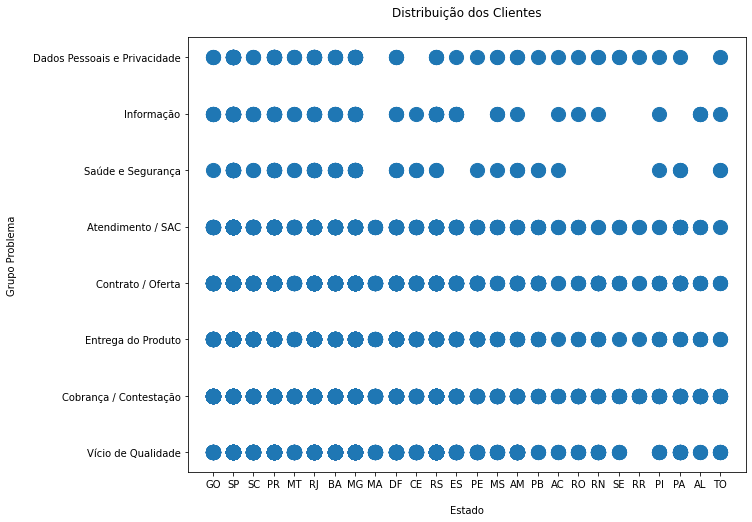

In [56]:
fig2 = plt.figure(figsize=(10, 8))
eixox = df_view1.catUF
eixoy = df_view1.catGrupoProblema

plt.scatter(eixox, eixoy, s=200)
plt.xticks(ticks=list(range(len(df_view1.UF.unique())+1))[1:], labels= df_view1.UF.unique())
plt.yticks(ticks=list(range(len(df_view1.GrupoProblema.unique())+1))[1:], labels= df_view1.GrupoProblema.unique())

plt.title("Distribuição dos Clientes\n")
plt.xlabel("\nEstado")
plt.ylabel("Grupo Problema\n")

plt.show()

Usando a técnica de Redução de Dimensionalidade TSNE para visualização do Dataset antes da aplicação do modelo, com todos os atributos transformados.

In [57]:
#Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

tsne1 = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_cat1.iloc[:,:-1])
df_tsn = pd.DataFrame(data={"1d":list(tsne1[:,0]), "2d": list(tsne1[:, 1])})

A distribuição mostrada neste gráfico (alimentado com os dados após a redução de dimensão), apresenta alguns picos, podendo ser interpretado como indícios de um agrupamento, que posteriormente poderão se tornar clusters após a aplicação do modelo.

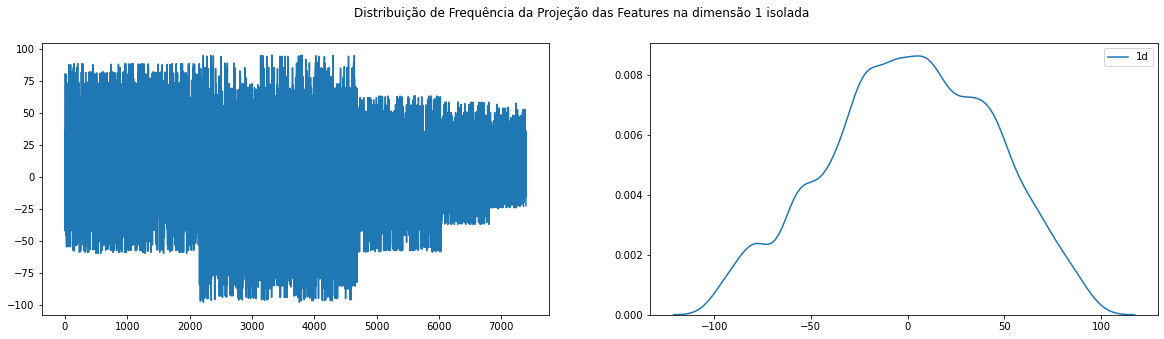

In [58]:
fig, axes = plt.subplots(1,2, figsize=(20, 5)) #, sharex=True)
fig.suptitle("Distribuição de Frequência da Projeção das Features na dimensão 1 isolada")

sb.set_palette("Accent") 
sb.lineplot(ax= axes[0], data = df_tsn.iloc[:,0] )
sb.kdeplot(ax=axes[1], data= df_tsn.iloc[:,0])
plt.show()

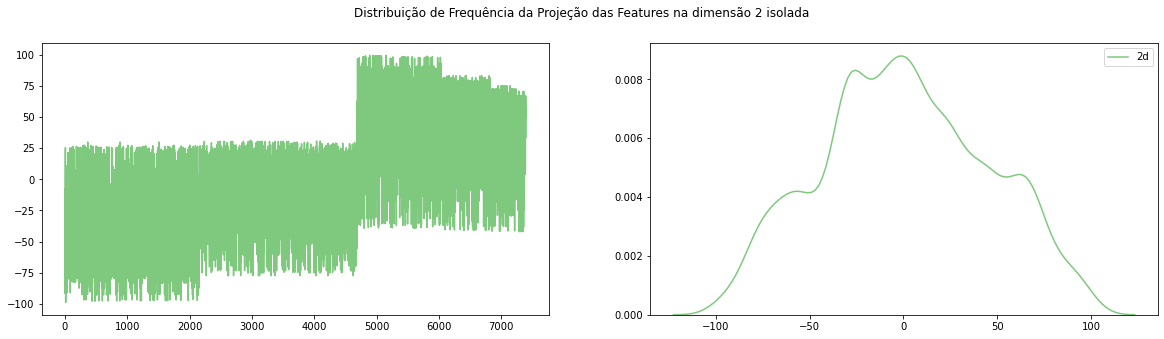

In [59]:
fig, axes = plt.subplots(1,2, figsize=(20, 5)) #, sharex=True)
fig.suptitle("Distribuição de Frequência da Projeção das Features na dimensão 2 isolada")

sb.set_palette("PuOr") 
sb.lineplot(ax= axes[0], data = df_tsn.iloc[:,1] )
sb.kdeplot(ax=axes[1], data= df_tsn.iloc[:,1])
plt.show()

<Figure size 1296x720 with 0 Axes>

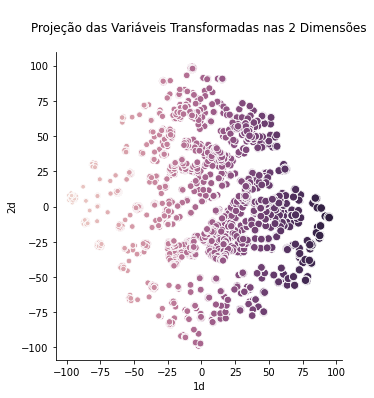

In [60]:
fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsn, legend=False, hue="1d", size="1d")#, palette=sb.color_palette("crest")) #, as_cmap=True))  #, style="1d", )
plt.title("\nProjeção das Variáveis Transformadas nas 2 Dimensões\n")           
plt.show()

## Tranformação dos Dados

In [61]:
#df_personas.FaixaEtaria.value_counts(sort=False)

In [62]:
df_personas.iloc[:,[0, 1, 3]]

,UF,Sexo,GrupoProblema
638525,GO,F,Vício de Qualidade
276706,SP,F,Cobrança / Contestação
88437,SC,M,Entrega do Produto
27359,PR,M,Cobrança / Contestação
726572,MT,F,Contrato / Oferta
...,...,...,...
658375,SP,F,Cobrança / Contestação
70705,SC,F,Cobrança / Contestação
36271,BA,M,Cobrança / Contestação
272624,MG,F,Cobrança / Contestação


Usando o método OneHotEncoder para tranformação de Variáveis de Escala Nominal

In [63]:
cat = OneHotEncoder(cols=["UF", "Sexo", "GrupoProblema"], use_cat_names=True, return_df=True)
cat1= cat.fit_transform(df_personas) 
#Aplicar apenas o método .tranform(df_test) sobre o df de teste, pois ele usará a mesma máscara de colunas aplicada no df_train

df_cat = pd.DataFrame(cat1)
df_cat.dropna(inplace=True)

#Features
df_model = df_cat.drop(columns=["FaixaEtaria"])
df_model.head()

,UF_GO,UF_SP,UF_SC,UF_PR,UF_MT,UF_RJ,UF_BA,UF_MG,UF_MA,UF_DF,...,Sexo_M,Sexo_O,GrupoProblema_Vício de Qualidade,GrupoProblema_Cobrança / Contestação,GrupoProblema_Entrega do Produto,GrupoProblema_Contrato / Oferta,GrupoProblema_Atendimento / SAC,GrupoProblema_Saúde e Segurança,GrupoProblema_Informação,GrupoProblema_Dados Pessoais e Privacidade
638525,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
276706,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88437,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
27359,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
726572,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Model Training

### Definição do K

Método de Elbow para definição de k

In [64]:
wcss = []
for i in range(1, 25):
    tmodel = KMedoids(n_clusters=i+1, metric='euclidean', init='k-medoids++', max_iter = 800, method='pam', random_state=2)
    tmodel.fit(df_model)
    wcss.append(tmodel.inertia_)

In [65]:
len(wcss)

24

Visualização da Curva

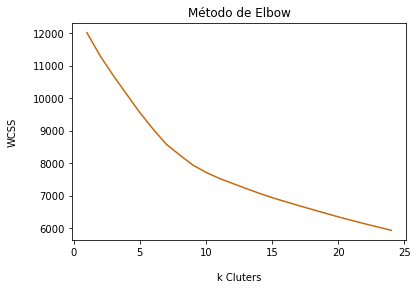

In [66]:
plt.plot(range(1, 24+1), wcss)
plt.title("Método de Elbow")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.show()

### Treinamento

In [67]:
k = 8
metric = "euclidean"

    #Model definition
#O uso do parâmetro de inicialização atribuído com'k-medoids++', faz com que a definição das coordenadas 
#dos medoids iniciem geralmentes distantes umas das outras, fazendo com que o algoritmo tenda a ter melhores 
#resultados que uma inicialização aleatória.
model = KMedoids(n_clusters=k, metric=metric, method='pam', init='k-medoids++', random_state=2)

    #Model traning
model.fit(df_model)

KMedoids(init='k-medoids++', method='pam', random_state=2)

Centro dos Clusters / Medóids: O retorno é a localização geométrica dos medoids, coordenadas do espaço vetorial multidimensional, neste caso 36 dimensões

In [68]:
medoids = model.cluster_centers_

Retorna a POSIÇÃO dos índices (não os rótulos) dos Medóids no DataFrame usado para treinar o modelo

In [69]:
medoids_index = list(model.medoid_indices_)
medoids_index

[15, 28, 1, 5958, 39, 7, 26, 4173]

Lista ordenada do rótulo do cluster atribuído, linha a linha, pelo modelo treinado

In [70]:
labels = model.labels_
labels

array([4, 2, 7, ..., 3, 2, 1])

Rótulos usados pelo modelo para diferenciar cada cluster

In [71]:
rotulos= np.unique(labels)
rotulos

array([0, 1, 2, 3, 4, 5, 6, 7])

Quantidade de eventos por cluster. 

OBS: Curioso como parece que a rotulação de cada cluster é, predominantemente, inversamente proporcional a quantidade de observações, dando a entender que o modelo rotula e/ou encontra os clusters, dos maiores aglomerados para os menores aglomerados.

In [72]:
freq = pd.Series(labels)
pd.DataFrame({"Frequência do Cluster":freq.value_counts()}).head(None)

,Frequência do Cluster
1,1279
2,1161
0,1151
3,926
5,885
4,681
6,660
7,651


## Performance Metrics

### Coeficiente de Silhueta Média

Cálculo do Coeficiente de Silhueta Média para cada cluster

In [73]:
#Ver https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

cof_silh = me.silhouette_samples(df_model, labels)

for ki in range(k):
    print("Silhueta Média para Cluster {:}: {:.2f} +- {:.4f}".format(ki, 
                                                                   np.mean(cof_silh[labels==ki]),
                                                                   np.std(cof_silh[labels==ki]/np.sum(labels==ki)**.5)))  

print("\nO melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos.")

Silhueta Média para Cluster 0: 0.13 +- 0.0017
Silhueta Média para Cluster 1: 0.15 +- 0.0021
Silhueta Média para Cluster 2: 0.34 +- 0.0010
Silhueta Média para Cluster 3: 0.34 +- 0.0011
Silhueta Média para Cluster 4: 0.34 +- 0.0009
Silhueta Média para Cluster 5: 0.35 +- 0.0016
Silhueta Média para Cluster 6: 0.37 +- 0.0029
Silhueta Média para Cluster 7: 0.37 +- 0.0031

O melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos.


Outras métricas aplicadas (geralmente em dados numéricos):
- Soma das Distâncias Internas (Sum of Squares Within Clusters - SSW) e
- Soma das distâncias externas (Sum of Squares Between Clusters - SSB)

### Comparação- Medidas de Dissimilaridade

Comparação entre diferentes medidas de dissimilaridade através do índice de Calinski-Harabasz, também conhecido como Critério da Razão de Variância  

In [74]:
modelos = []
medidas = ['euclidean', 'l2', 'l1', 'manhattan', 
           'cityblock', 'braycurtis', 'canberra', 
           'chebyshev', 'correlation', 'cosine', 
           'hamming', 'mahalanobis', 'matching',
           #'minkowski', 'wminkowski', 'haversine',
           'rogerstanimoto', 'russellrao',
           'seuclidean', 'sokalmichener', 'sokalsneath',
           'sqeuclidean', 'yule',
           'nan_euclidean']

for i in range(len(medidas)):
    imodel = KMedoids(n_clusters=8, metric=medidas[i], init='k-medoids++', max_iter = 300, method='pam', random_state=2)
    imodel.fit(df_model)
    modelos.append(imodel)
    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1466: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarn

In [75]:
modelos

[KMedoids(init='k-medoids++', method='pam', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='l2', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='l1', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='manhattan', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='cityblock', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='braycurtis', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='canberra', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='chebyshev', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='correlation', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='cosine', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='hamming', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='mahalanobis', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='matching', 

In [76]:
metricas = []
for a in range(len(modelos)):
    metrica = me.calinski_harabasz_score(df_model, modelos[a].labels_)
    metricas.append(metrica)

for b in range(len(modelos)):
    print("O Índice Calinski-Harabasz da Medida {:} é: {:.4f}".format(modelos[b].metric, metricas[b]))

print("\nUma pontuação mais alta se refere a um modelo com clusters mais bem definidos.")

O Índice Calinski-Harabasz da Medida euclidean é: 1088.5614
O Índice Calinski-Harabasz da Medida l2 é: 1088.5614
O Índice Calinski-Harabasz da Medida l1 é: 983.4082
O Índice Calinski-Harabasz da Medida manhattan é: 983.4082
O Índice Calinski-Harabasz da Medida cityblock é: 983.4082
O Índice Calinski-Harabasz da Medida braycurtis é: 983.4082
O Índice Calinski-Harabasz da Medida canberra é: 983.4082
O Índice Calinski-Harabasz da Medida chebyshev é: 225.0213
O Índice Calinski-Harabasz da Medida correlation é: 970.8803
O Índice Calinski-Harabasz da Medida cosine é: 983.4082
O Índice Calinski-Harabasz da Medida hamming é: 983.4082
O Índice Calinski-Harabasz da Medida mahalanobis é: 484.2494
O Índice Calinski-Harabasz da Medida matching é: 983.4082
O Índice Calinski-Harabasz da Medida rogerstanimoto é: 974.9941
O Índice Calinski-Harabasz da Medida russellrao é: 983.4082
O Índice Calinski-Harabasz da Medida seuclidean é: 498.7157
O Índice Calinski-Harabasz da Medida sokalmichener é: 974.9941


Comparação entre Medidas

In [77]:
modelos_bool = []
medidas_bool = ['dice', 'jaccard', 'kulsinski']

for i in range(len(medidas_bool)):
    imodel = KMedoids(n_clusters=8, metric=medidas_bool[i], init='k-medoids++', max_iter = 300, method='pam', random_state=2)
    imodel.fit(df_model)
    modelos_bool.append(imodel)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/pair

In [78]:
modelos_bool

[KMedoids(init='k-medoids++', method='pam', metric='dice', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='jaccard', random_state=2),
 KMedoids(init='k-medoids++', method='pam', metric='kulsinski', random_state=2)]

In [79]:
metricas_bool = []
for a in range(len(modelos_bool)):
    metrica_b = me.calinski_harabasz_score(df_model, modelos_bool[a].labels_)
    metricas_bool.append(metrica_b)

for b in range(len(modelos_bool)):
    print("O Índice Calinski-Harabasz da Medida {:} é: {:.4f}".format(modelos_bool[b].metric, metricas_bool[b]))

print("\nUma pontuação mais alta se refere a um modelo com clusters mais bem definidos.")

O Índice Calinski-Harabasz da Medida dice é: 983.4082
O Índice Calinski-Harabasz da Medida jaccard é: 1065.7371
O Índice Calinski-Harabasz da Medida kulsinski é: 983.4082

Uma pontuação mais alta se refere a um modelo com clusters mais bem definidos.


## Visualização dos Resultados

In [80]:
df_treinado = df_model.copy()
df_treinado["K-Cluster"]= labels

In [81]:
pd.crosstab(df_treinado["K-Cluster"], df_treinado.Sexo_F)

Sexo_F,0,1
K-Cluster,,
0,1151,0
1,1,1278
2,0,1161
3,926,0
4,0,681
5,885,0
6,0,660
7,651,0


Tabela contendo um dos principais clusters, segundo a métrica da silhueta, com K-Cluster = 3 (quarta persona)

In [82]:
df_cluster3 = df_treinado.loc[df_treinado["K-Cluster"]==3, :]
df_cluster3.head(None)

,UF_GO,UF_SP,UF_SC,UF_PR,UF_MT,UF_RJ,UF_BA,UF_MG,UF_MA,UF_DF,...,Sexo_O,GrupoProblema_Vício de Qualidade,GrupoProblema_Cobrança / Contestação,GrupoProblema_Entrega do Produto,GrupoProblema_Contrato / Oferta,GrupoProblema_Atendimento / SAC,GrupoProblema_Saúde e Segurança,GrupoProblema_Informação,GrupoProblema_Dados Pessoais e Privacidade,K-Cluster
27359,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
119061,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
360773,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
192635,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
578072,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178864,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
652058,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
417205,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
268091,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3


In [83]:
#Por algum motivo, os índices retornados pelo atributo .medoid_indices_ não aparecem no dataset ao filtrar.
#ERRADO: df_medoid_k= df_treinado.loc[medoids_index]
#CERTO: df_medoid_k= df_treinado.iloc[medoids_index]                            

#O erro ocorreu pelo fato do atributo dos índices dos centros do modelo treinado, retornar a POSIÇÃO dos 
#índices, não os rótulos, o que deve ser levado em consideração na hora de consumir tais dados.

In [84]:
#Como não consegui filtrar o dataframe pelo índice dos medoids, recostrui o dataframe com base no retorno 
#do atributo .cluster_centers_

medoids= medoids.reshape(8, 37) #Número de cluster x número colunas (38)-1
temp = []

for lin in range(len(medoids)):
    linha = list(medoids[lin])
    linha.append(lin)
    temp.append(linha)

medoids = np.array(temp)
medoids =medoids.reshape(8,38) #Número de cluster x número colunas (38)


df_medoid_k = pd.DataFrame(columns=[df_treinado.columns], data= medoids)
df_medoid_k.head()

,UF_GO,UF_SP,UF_SC,UF_PR,UF_MT,UF_RJ,UF_BA,UF_MG,UF_MA,UF_DF,...,Sexo_O,GrupoProblema_Vício de Qualidade,GrupoProblema_Cobrança / Contestação,GrupoProblema_Entrega do Produto,GrupoProblema_Contrato / Oferta,GrupoProblema_Atendimento / SAC,GrupoProblema_Saúde e Segurança,GrupoProblema_Informação,GrupoProblema_Dados Pessoais e Privacidade,K-Cluster
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4


Desfazendo a transformação feita no pré-processamento para visualizar as features que determinaram cada medoid

In [85]:
#OBS: Como este é o cluster zero, a última coluna será eliminada pela aplicação da máscara booleana, 
#e por isso o filtro de linha pelo uso do .loc[] é suficiente.

medoid0 = df_medoid_k.loc[0:0,:]
mask= list(medoid0.apply(lambda x: x!=0 , axis= 1 ).loc[0])
medoid_0 = medoid0.loc[:, mask].T

atributos = list(medoid_0.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_0 = pd.DataFrame({"Medoid_0":lin}, index=col)
df_medoid_0.head()


,Medoid_0
UF,SP
Sexo,M
GrupoProblema,Vício de Qualidade


In [86]:
#OBS: Neste caso a coluna do cluster não é eliminada pela máscara booleana, fazendo-se necessário usar o .iloc[],
#o que por consequência altera a configuração do filtro 

k=1 
medoid1 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid1.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_1 = medoid1.loc[:, mask].T

atributos = list(medoid_1.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_1 = pd.DataFrame({"Medoid_1":lin}, index=col)
df_medoid_1.head()


,Medoid_1
UF,SP
Sexo,F
GrupoProblema,Contrato / Oferta


In [87]:
k=2
medoid2 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid2.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_2 = medoid2.loc[:, mask].T

atributos = list(medoid_2.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_2 = pd.DataFrame({"Medoid_2":lin}, index=col)
df_medoid_2.head()


,Medoid_2
UF,SP
Sexo,F
GrupoProblema,Cobrança / Contestação


In [88]:
k=3
medoid3 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid3.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_3 = medoid3.loc[:, mask].T

atributos = list(medoid_3.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_3 = pd.DataFrame({"Medoid_3":lin}, index=col)
df_medoid_3.head()


,Medoid_3
UF,SP
Sexo,M
GrupoProblema,Cobrança / Contestação


In [89]:
k=4
medoid4 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid4.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_4 = medoid4.loc[:, mask].T

atributos = list(medoid_4.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_4 = pd.DataFrame({"Medoid_4":lin}, index=col)
df_medoid_4.head()


,Medoid_4
UF,SP
Sexo,F
GrupoProblema,Vício de Qualidade


In [90]:
k=5
medoid5 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid5.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_5 = medoid5.loc[:, mask].T

atributos = list(medoid_5.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_5 = pd.DataFrame({"Medoid_5":lin}, index=col)
df_medoid_5.head()


,Medoid_5
UF,SP
Sexo,M
GrupoProblema,Contrato / Oferta


In [91]:
k=6
medoid6 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid6.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_6 = medoid6.loc[:, mask].T

atributos = list(medoid_6.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_6 = pd.DataFrame({"Medoid_6":lin}, index=col)
df_medoid_6.head()


,Medoid_6
UF,SP
Sexo,F
GrupoProblema,Entrega do Produto


In [92]:
k=7
medoid7 = df_medoid_k.iloc[k:k+1,:-1]
mask= list(medoid7.apply(lambda x: x!=0 , axis= 1).loc[k])
medoid_7 = medoid7.loc[:, mask].T

atributos = list(medoid_7.index)
col = []
lin = []

for i in range(len(atributos)):
    c, l = atributos[i][0].split("_")
    col.append(c)
    lin.append(l)

df_medoid_7 = pd.DataFrame({"Medoid_7":lin}, index=col)
df_medoid_7.head()


,Medoid_7
UF,SP
Sexo,M
GrupoProblema,Entrega do Produto


Usando a técnica de Redução de Dimensionalidade TSNE para visualização do Dataset após a aplicação do modelo, com todos os atributos transformados

In [93]:
tsne2 = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado)
df_tsn2 = pd.DataFrame(data={"1d":list(tsne2[:,0]), "2d": list(tsne2[:, 1])})                                                                 

<Figure size 1296x720 with 0 Axes>

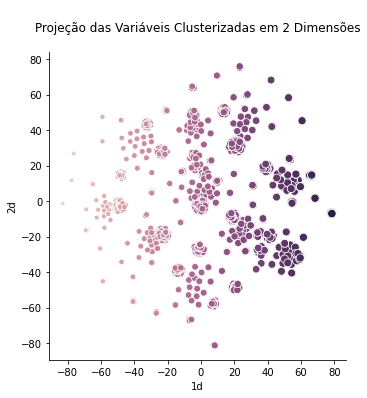

In [96]:
fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsn2, legend=False, hue="1d", size="1d")#, palette=sb.color_palette("rocket", as_cmap=True))  #, style="1d", )
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()